In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Monty Hall

1. Put prizes behind doors randomly
2. I pick a door
3. Monty opens a door
4. Reveal what was behind each door

### Step 1: Set up game

In [2]:
doors = make_array(1, 2, 3)
doors

array([1, 2, 3])

In [3]:
prizes = make_array('car', 'first goat', 'second goat')
prizes

array(['car', 'first goat', 'second goat'], 
      dtype='<U11')

In [4]:
def setup():
    """Return a random game of Let's Make a Deal."""
    return Table().with_columns(
        'Door', doors,
        'Prize', np.random.choice(prizes, 3, replace=False)
    )

a_game = setup()
a_game

Door,Prize
1,first goat
2,car
3,second goat


### Step 2: Pick a door

In [7]:
a_guess = np.random.choice(doors)
a_guess

3

### Step 3: Monty opens a door

In [9]:
def behind(game, door):
    """Return the prize behind a door."""
    return game.where('Door', door).column('Prize').item(0)

for door in doors:
    print('Behind door number', door, 'is the', behind(a_game, door))

Behind door number 1 is the first goat
Behind door number 2 is the car
Behind door number 3 is the second goat


In [10]:
def location(game, prize):
    """Return the door that hides a prize."""
    return game.where('Prize', prize).column('Door').item(0)

for prize in prizes:
    print('The', prize, 'is behind door number', location(a_game, prize))

The car is behind door number 2
The first goat is behind door number 1
The second goat is behind door number 3


In [11]:
def expose(game, guess):
    """Return the door that Monty Hall opens to expose a goat."""
    guessed_prize = behind(game, guess)
    if guessed_prize == 'first goat':
        reveal = 'second goat'
    elif guessed_prize == 'second goat':
        reveal = 'first goat'
    else:
        reveal = np.random.choice(['first goat', 'second goat'])
    return location(game, reveal)

an_exposed_door = expose(a_game, a_guess)
print('The contestant picked door', a_guess, 'which hides the', behind(a_game, a_guess))
print('Monty Hall opens door', an_exposed_door, 'to expose the', behind(a_game, an_exposed_door))

The contestant picked door 3 which hides the second goat
Monty Hall opens door 1 to expose the first goat


In [12]:
def other(game, guess, exposed):
    """Return the door that is not the guess or the exposed."""
    return (1 + 2 + 3) - guess - exposed

the_remaining_door = other(a_game, a_guess, an_exposed_door)
print('The remaining door', the_remaining_door, 'hides the', behind(a_game, the_remaining_door))

The remaining door 2 hides the car


### Step 4: Reveal all doors, Repeat

**Let's simulate one game of the Monty Hall Problem. Create a list where the first element is the prize behind the first guess, the second is the prize behind Monty's exposed door, and the third is the prize behind the remaining door.**

In [22]:
game

Door,Prize
1,second goat
2,first goat
3,car


In [21]:
game = setup()
guess = np.random.choice(doors)
exposed = expose(game, guess)
remaining = other(game, guess, exposed)
[behind(game, guess), behind(game, exposed), behind(game, remaining)]

['car', 'first goat', 'second goat']

In [23]:
trials = Table(['trial', 'guess', 'exposed', 'remaining'])
for i in np.arange(10000):
    game = setup()
    guess = np.random.choice(doors)
    exposed = expose(game, guess)
    remaining = other(game, guess, exposed)
    trials.append([i, behind(game, guess), behind(game, exposed), behind(game, remaining)])

In [24]:
trials

trial,guess,exposed,remaining
0,car,first goat,second goat
1,first goat,second goat,car
2,second goat,first goat,car
3,first goat,second goat,car
4,car,first goat,second goat
5,second goat,first goat,car
6,first goat,second goat,car
7,first goat,second goat,car
8,car,first goat,second goat
9,second goat,first goat,car


In [25]:
trials.group('guess')

guess,count
car,3372
first goat,3324
second goat,3304


In [26]:
trials.group('remaining')

remaining,count
car,6628
first goat,1673
second goat,1699


(0, 6000)

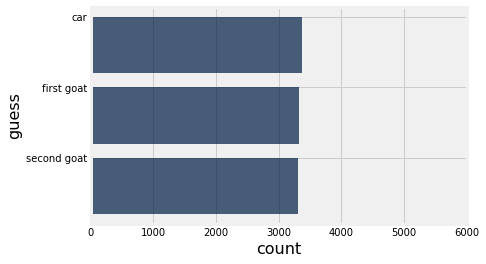

In [30]:
trials.group('guess').barh('guess')
plt.xlim(0, 6000)

(0, 6000)

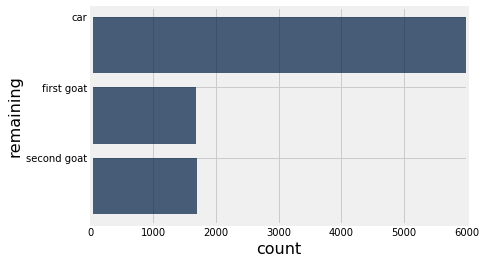

In [31]:
trials.group('remaining').barh('remaining')
plt.xlim(0, 6000)

## Probability


GR

GB

RG

RB

BG

BR

1/3 * 1/2 = 1/6

P(one R and one G) ?

1/6 + 1/6 = 1/3

## Sampling

In [33]:
top = Table.read_table('http://inferentialthinking.com/notebooks/top_movies.csv')
top = top.with_column('Row Index', np.arange(top.num_rows)).move_to_start('Row Index')
top

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
5,The Dark Knight,Warner Bros.,534858444,647761600,2008
6,Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
7,Star Wars,Fox,460998007,1549640500,1977
8,Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
9,The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


In [34]:
top.take(make_array(3, 5, 8))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
3,Jurassic World,Universal,652270625,687728000,2015
5,The Dark Knight,Warner Bros.,534858444,647761600,2008
8,Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015


In [35]:
top.where('Title', are.containing('and the'))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
22,Harry Potter and the Deathly Hallows Part 2,Warner Bros.,381011219,417512200,2011
43,Harry Potter and the Sorcerer's Stone,Warner Bros.,317575550,486442900,2001
44,Indiana Jones and the Kingdom of the Crystal Skull,Paramount,317101119,384231200,2008
54,Harry Potter and the Half-Blood Prince,Warner Bros.,301959197,352098800,2009
59,Harry Potter and the Order of the Phoenix,Warner Bros.,292004738,369250200,2007
60,"The Chronicles of Narnia: The Lion, the Witch and the Wa ...",Buena Vista (Disney),291710957,393033100,2005
62,Harry Potter and the Goblet of Fire,Warner Bros.,290013036,393024800,2005
69,Harry Potter and the Chamber of Secrets,Warner Bros.,261988482,390768100,2002
76,Harry Potter and the Prisoner of Azkaban,Warner Bros.,249541069,349598600,2004
91,Beauty and the Beast,Buena Vista (Disney),218967620,394664300,1991


In [36]:
start = np.random.choice(np.arange(10))
top.take(np.arange(start, 200, 10))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
14,The Lion King,Buena Vista (Disney),422783777,775573900,1994
24,Star Wars: Episode III - Revenge of the Sith,Fox,380270577,516123900,2005
34,The Hunger Games: Mockingjay - Part 1,Lionsgate,337135885,354324000,2014
44,Indiana Jones and the Kingdom of the Crystal Skull,Paramount,317101119,384231200,2008
54,Harry Potter and the Half-Blood Prince,Warner Bros.,301959197,352098800,2009
64,Home Alone,Fox,285761243,589287500,1990
74,Night at the Museum,Fox,250863268,322261900,2006
84,Beverly Hills Cop,Paramount,234760478,584205200,1984
94,Saving Private Ryan,Dreamworks,216540909,397999500,1998


In [37]:
top.sample(5)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
191,Psycho,Universal,32000000,371200100,1960
188,Rear Window,Paramount,36764313,438086300,1954
17,The Hunger Games,Lionsgate,408010692,442510400,2012
111,Top Gun,Paramount,179800601,417818200,1986
109,Mission: Impossible,Paramount,180981856,356231300,1996


In [38]:
top.sample(5, with_replacement=False)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
135,The Godfather,Paramount,134966411,686626300,1972
147,Doctor Zhivago,MGM,111721910,1079978500,1965
2,Titanic,Paramount,658672302,1178627900,1997
73,Batman,Warner Bros.,251188924,547705200,1989
99,Armageddon,Buena Vista (Disney),201578182,373929700,1998


## Dice 

In [39]:
die = Table().with_column('face', np.arange(1, 7))
die

face
1
2
3
4
5
6


In [40]:
die.sample(1)

face
2


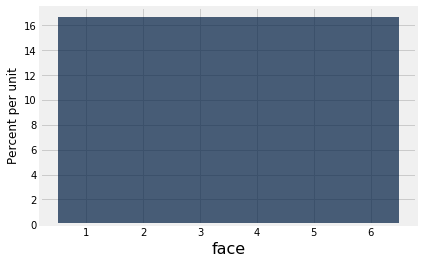

In [45]:
die.hist('face', bins=np.arange(0.5, 7, 1))

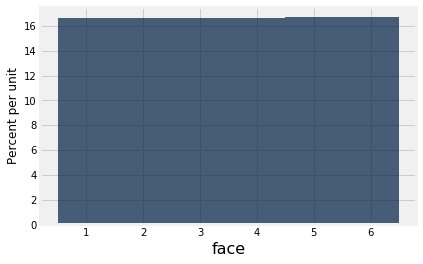

In [54]:
die.sample(1000000).hist('face', bins=np.arange(0.5, 7, 1))

## Flights

This is tomorrow's material but just in case we finish early:

In [13]:
united = Table.read_table('http://inferentialthinking.com/notebooks/united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10
